# MLP - UGE

In [6]:
from sklearn.neural_network import MLPRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

In [7]:
df = pd.read_excel("data/data_v2.xlsx", "7-90j")
column_X = ["t_cure", "teneur_ciment", "w_t", "silt", "kaol", "s", "illite", "W/C"]
column_Y = ["Rc"]
X = df[column_X]
y = df[column_Y]

In [8]:
train, test = train_test_split(df, test_size=0.5)
X_train, X_test = train[column_X], test[column_X]
y_train, y_test = train[column_Y], test[column_Y]
std_scaler2 = StandardScaler()
y_train_scaled = std_scaler2.fit_transform(y_train)
y_test_scaled = std_scaler2.transform(y_test)

In [9]:
mlp_regressor = MLPRegressor(activation="logistic", solver="lbfgs", max_iter=500)
mlp_pipe = make_pipeline(StandardScaler(), mlp_regressor)
H_grid = np.arange(8, 400, step=1)
param_grid = {"mlpregressor__hidden_layer_sizes":H_grid}
grid_search = GridSearchCV(mlp_pipe, param_grid=param_grid)

In [ ]:
grid_search.fit(X_train, y_train_scaled.ravel())

In [11]:
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print("Best training score : {}".format(grid_search.best_score_))
print()
print("Grid scores on development set:")
print()
means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, grid_search.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'mlpregressor__hidden_layer_sizes': 131}
Best training score : 0.6245494102356485

Grid scores on development set:

0.444 (+/-0.725) for {'mlpregressor__hidden_layer_sizes': 8}
0.101 (+/-1.343) for {'mlpregressor__hidden_layer_sizes': 9}
0.388 (+/-0.952) for {'mlpregressor__hidden_layer_sizes': 10}
0.294 (+/-0.752) for {'mlpregressor__hidden_layer_sizes': 11}
-0.187 (+/-2.032) for {'mlpregressor__hidden_layer_sizes': 12}
0.027 (+/-1.342) for {'mlpregressor__hidden_layer_sizes': 13}
0.218 (+/-1.150) for {'mlpregressor__hidden_layer_sizes': 14}
0.300 (+/-1.020) for {'mlpregressor__hidden_layer_sizes': 15}
0.310 (+/-0.738) for {'mlpregressor__hidden_layer_sizes': 16}
-0.051 (+/-1.799) for {'mlpregressor__hidden_layer_sizes': 17}
0.385 (+/-0.891) for {'mlpregressor__hidden_layer_sizes': 18}
0.428 (+/-0.431) for {'mlpregressor__hidden_layer_sizes': 19}
0.465 (+/-0.505) for {'mlpregressor__hidden_layer_sizes': 20}
0.182 (+/-0.844) for {'mlpregr

In [12]:
hls = grid_search.best_params_["mlpregressor__hidden_layer_sizes"]
MLP = make_pipeline(StandardScaler(), MLPRegressor(solver="lbfgs", hidden_layer_sizes=hls, max_iter=1000))
MLP.fit(X_train, y_train_scaled.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=131, max_iter=1000,
                              solver='lbfgs'))])

Text(0.5, 1.0, 'Importance of features on the training set')

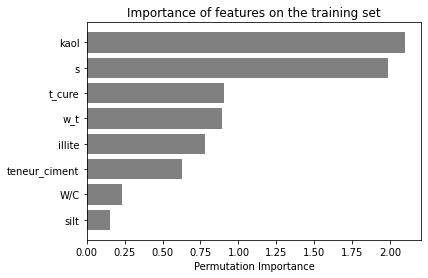

In [19]:
r_train = permutation_importance(MLP, X_train, y_train_scaled, n_repeats=100)
features = np.array(column_X)
sorted_idx_train = r_train.importances_mean.argsort()
plt.barh(features[sorted_idx_train], r_train.importances_mean[sorted_idx_train], color="gray")
plt.xlabel("Permutation Importance")
plt.title("Importance of features on the training set")

In [14]:
MLP.score(X_test, y_test_scaled.ravel())

0.7784190762853185

Text(0.5, 1.0, 'Importance of features of the testing set')

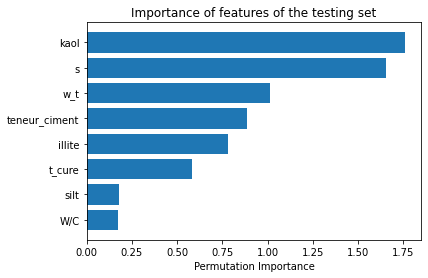

In [18]:
r_train = permutation_importance(MLP, X_test, y_test_scaled, n_repeats=100)
features = np.array(column_X)
sorted_idx_train = r_train.importances_mean.argsort()
plt.barh(features[sorted_idx_train], r_train.importances_mean[sorted_idx_train])
plt.xlabel("Permutation Importance")
plt.title("Importance of features of the testing set")